In [16]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline  

# The Data

Generate some data (in this example the data is normally distributed. Usually for ab testing it can be binomial too - such as probability of user to click on button)

In [95]:
# sample_a = np.random.normal(loc=2.0, scale=10.0, size=100)
# sample_a2 = np.random.normal(loc=2.7, scale=8.0, size=100)
# sample_b = np.random.normal(loc=3., scale=15.0, size=100)
bin_sample_a = np.random.binomial(n=1, p=0.6, size=1000)
bin_sample_a2 = np.random.binomial(n=1, p=0.63, size=1000)
bin_sample_b = np.random.binomial(n=1, p=0.69, size=400)

Baseline conversion rate is the existing conversion rate

Desired improvement is the minimum improvement we desire from the change (expensive changes have higher desired improvements because)

In [96]:
baseline_conversion_rate = np.sum(bin_sample_a)/float(len(bin_sample_a))
b_sample_conversion_rate = np.sum(bin_sample_b)/float(len(bin_sample_b))
a_sample_conversion_rate = np.sum(bin_sample_a2)/float(len(bin_sample_a2))

N_base = len(bin_sample_a)
N_b = len(bin_sample_b)
N_a2 = len(bin_sample_a2)
desired_improvement = 0.05

Plotting the distributions of the binomial samples:

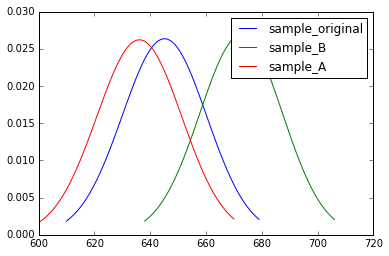

In [97]:
x = np.arange(scs.binom.ppf(0.01, 1000, baseline_conversion_rate), scs.binom.ppf(0.99, 1000, baseline_conversion_rate))
b = np.arange(scs.binom.ppf(0.01, 1000, b_sample_conversion_rate), scs.binom.ppf(0.99, 1000, b_sample_conversion_rate))
a = np.arange(scs.binom.ppf(0.01, 1000, a_sample_conversion_rate), scs.binom.ppf(0.99, 1000, a_sample_conversion_rate))


plt.plot(x, scs.binom.pmf(x, 1000, baseline_conversion_rate), label='sample_original')
plt.plot(b, scs.binom.pmf(b, 1000, b_sample_conversion_rate), label='sample_B')
plt.plot(a, scs.binom.pmf(a, 1000, a_sample_conversion_rate), label='sample_A')
plt.legend()

According to the Central Limit Theorem - with enough "experiments", the distribution of a 1/0 experiment will be normally distributed with mean p and variance p(1-p) , AND the coversion rate p will have a Normal distribution with sample mean=p and sample variance p(1-p)/n

This is great because I can use the standard hypothesis testing methods to evaluate whether the experiment was successfull!

# Hypothesis Testing

H0= original sample and sample B come from the same distribution. In other words: the difference of conversion rate d is normally distributed with mean: 0 and variance variance_a+variance_b

H1= original sample and sample B come from different distributions. Specifically the mean of sample B is higher than sample A (one sided test). In other words: the difference of conversion rate d is normally distributed with mean: p_b-p_a and variance variance_a+variance_b

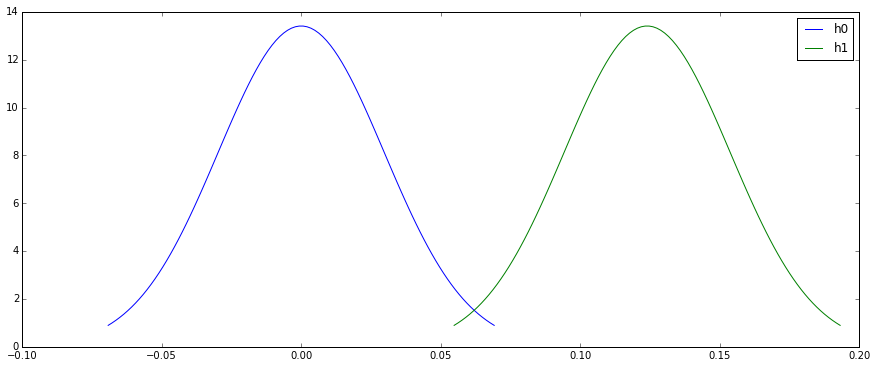

In [53]:
d_difference = b_sample_conversion_rate - baseline_conversion_rate

std_a = np.sqrt((baseline_conversion_rate*(1-baseline_conversion_rate))/N_base)
std_b = np.sqrt((b_sample_conversion_rate*(1-b_sample_conversion_rate))/N_b)
test_std=std_a+std_b

d_null = np.linspace(scs.norm.ppf(0.01, 0, test_std), scs.norm.ppf(0.99, 0, test_std), 100)
d = np.linspace(scs.norm.ppf(0.01, d_difference, test_std), scs.norm.ppf(0.99, d_difference, test_std), 100)

plt.figure(figsize=(15,6))
plt.plot(d_null, scs.norm.pdf(d_null, 0, test_std), label='h0')
plt.plot(d, scs.norm.pdf(d, d_difference, test_std), label='h1')
plt.legend()

The two distributions look definitely different. How do we measure that more formally?

Confidence Intervals!

The *confidence interval* is the area under the tails of the null hypotesis. In this case, the hypotesis is one sided so we only look at the right tail.

A confidence interval of 95% tells us that no matter how many times this experiment is run, the probability that the conversion rate will fall in that tail is 5% or less. 

 The area is probability that we wrongly reject H0. In other words, the probability of a false positive is 5% or less.


In [ ]:
INSERT PLOT OF CONFIDENCE INTERVAL

Power of a Test!

Statistical power is the area under the H1 hypothesis distribution and outside of the confidence interval of H0.

The power is the probability that we accept H1 hypothesis and reject the H0 and is equal to the area shaded green - true positive.

In [ ]:
INSERT PLOT OF POWER

The opposite area is called the beta of a test, which is the probability of a false negative (reject H1 when H1 is true)

In [ ]:
INSERT PLOT OF BETA

# Sample Sizes 

Sample sizes affect the variance of the distributions. Therefore we can influence the power of the test by collecting more samples in the experiment

INSERT PLOT OF POWER WITH DIFFERENT NS

How to calculate optimal N?

In [94]:
z_power=scs.norm.ppf(0.8)
z_alpha=scs.norm.ppf(0.975)
pooled_p= (b_sample_conversion_rate + baseline_conversion_rate)/2

n = (2*pooled_p*(1-pooled_p)*(z_alpha+z_power)*(z_alpha+z_power)) / ((b_sample_conversion_rate + baseline_conversion_rate)*(b_sample_conversion_rate + baseline_conversion_rate))

# Confidence Intervals